In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.io import loadmat
import pandas as pd
import os
%matplotlib inline

In [2]:
def NGD2L_TK_AS(T, epsilon, gamma, omegastar, deltastar, tau_y, Dmp):
    dt = np.mean(np.diff(T))
    dt = dt/50
    T = np.arange(0, T[-1]+dt, dt)
    x = T/tau_y /tau_y *np.exp(-T/tau_y)*dt
    
    Kw = -Dmp*( 1/np.cos(deltastar)*np.exp(-epsilon*T)*np.cos(T*omegastar+deltastar) -np.exp(-gamma*T) )
    w = np.convolve(x, Kw, 'full')[:len(T):50]*dt
    return w/(dt)

# load files 

In [3]:
BS = loadmat('D:\\GoogleDrive\\retina\\oled_boundary_set', squeeze_me =True)

exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210513\\'
direction = 'UD'

SVDnSTK = loadmat(exp_folder+'Analyzed_data\\30Hz_27_RF_15min\\unsort\\STK.mat'
                  , squeeze_me =True)

loadfiles = np.load(exp_folder+'\\Analyzed_data\\fitNGD2LASpara.npz', allow_pickle=True)

In [4]:
STK = SVDnSTK['gauss_RF']

In [5]:
cn = 9

In [6]:
dt=0.01 #large dt will cause  overflow
nstep = int(1./dt)
TKtaxis = np.arange(nstep)*dt
for k in loadfiles.files:
    vars()[k] = loadfiles[k][()]
TKAS = NGD2L_TK_AS(TKtaxis, *pd.DataFrame(para_dict).loc[cn-1][:-1])

# plot STK

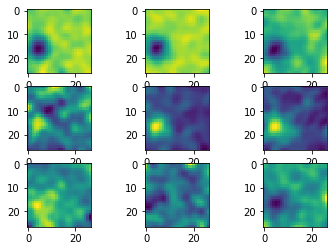

In [7]:
fig, ax = plt.subplots(3,3)
for i in range(9):
    ax.flatten()[i].imshow(STK[i,:,:,cn-1])

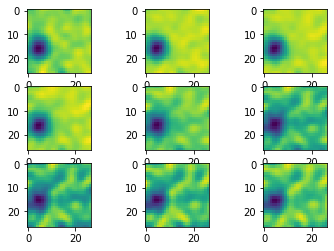

In [8]:
fig, ax = plt.subplots(3,3)
for i in range(9):
    ax.flatten()[i].imshow(np.sum(STK[:i+1,:,:,cn-1], axis = 0))

# SVD

In [9]:
rSTK = STK[:,:,:,cn-1].reshape((9,-1))
U,sigma,VT=np.linalg.svd(rSTK)

In [10]:
sigma/np.sum(sigma)

array([0.44918686, 0.11267262, 0.08030217, 0.07310253, 0.06307168,
       0.06186315, 0.05926193, 0.05263538, 0.0479037 ])

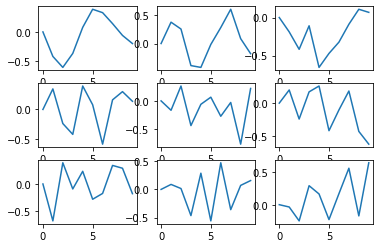

In [11]:
fig, ax = plt.subplots(3,3)
for i in range(9):
    ax.flatten()[i].plot(np.append(0,U[:,i]))

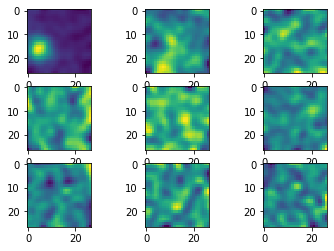

In [12]:
fig, ax = plt.subplots(3,3)
for i in range(9):
    ax.flatten()[i].imshow(VT[i,:].reshape((27,27)))

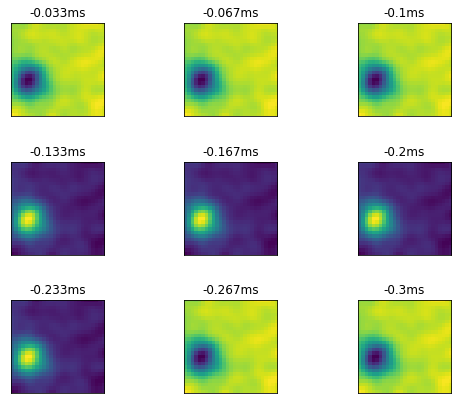

In [13]:
fig, ax = plt.subplots(3,3)
for i in range(9):
    ax.flatten()[i].imshow(VT[0,:].reshape((27,27)) * U[i,0])
    ax.flatten()[i].set_title(str(-1*np.round((i+1)/30, 3))+'ms')
    ax.flatten()[i].axes.xaxis.set_visible(False)
    ax.flatten()[i].axes.yaxis.set_visible(False)
fig.tight_layout()
fig.set_size_inches(8,6)

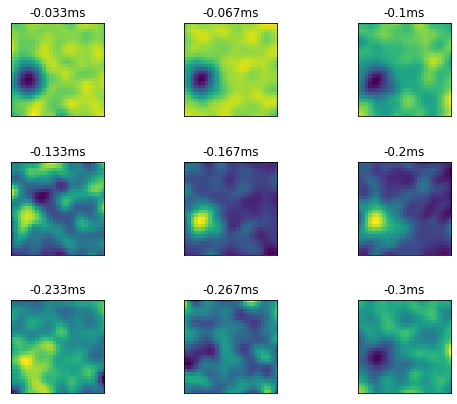

In [14]:
fig, ax = plt.subplots(3,3)
for i in range(9):
    ax.flatten()[i].imshow(STK[i,:,:,cn-1])
    ax.flatten()[i].set_title(str(-1*np.round((i+1)/30, 3))+'ms')
    ax.flatten()[i].axes.xaxis.set_visible(False)
    ax.flatten()[i].axes.yaxis.set_visible(False)
fig.tight_layout()
fig.set_size_inches(8,6)

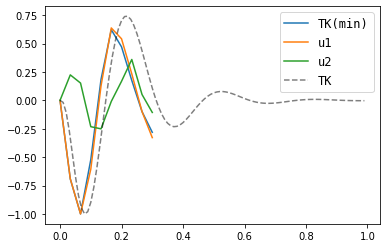

In [15]:
argminTK = STK[:,np.where(STK[:,:,:,cn-1] == np.min(STK[:,:,:,cn-1]))[1]
                          ,np.where(STK[:,:,:,cn-1] == np.min(STK[:,:,:,cn-1]))[2],cn-1]
plt.plot(np.arange(10)/30., np.append(0,argminTK)/-min(argminTK), label='TK(min)')
plt.plot(np.arange(10)/30., np.append(0,U[:,0]) /-min(U[:,0]) , label='u1')
plt.plot(np.arange(10)/30., np.append(0,U[:,1]) /-min(U[:,1])*sigma[1]/sigma[0] , label='u2')
plt.plot(TKtaxis, TKAS/-min(TKAS), 'k--', label = 'TK', alpha = 0.5)

plt.legend(loc='best', prop={'size': 'large', 'family': 'monospace'})

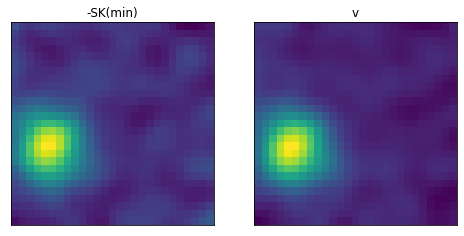

In [16]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(np.squeeze(-STK[np.where(STK[:,:,:,cn-1] == np.min(STK[:,:,:,cn-1]))[0],:,:,cn-1]))
ax[0].set_title('-SK(min)')
ax[1].imshow(VT[0,:].reshape((27,27)))
ax[1].set_title('v')
for a in ax:
    a.axes.xaxis.set_visible(False)
    a.axes.yaxis.set_visible(False)
fig.set_size_inches(8,6)

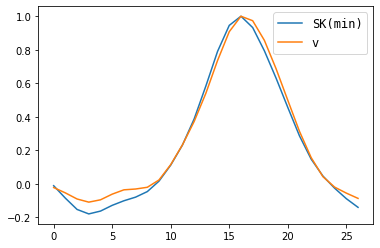

In [17]:
argminSKcut = np.squeeze(STK[np.where(STK[:,:,:,cn-1] == np.min(STK[:,:,:,cn-1]))[0],
                             :,
                             np.where(STK[:,:,:,cn-1] == np.min(STK[:,:,:,cn-1]))[2],  cn-1])
plt.plot(argminSKcut/ min(argminSKcut), label='SK(min)')
v = VT[0,:].reshape((27,27))
vcut = v[:, np.where(STK[:,:,:,cn-1] == np.min(STK[:,:,:,cn-1]))[2]]
plt.plot(vcut/ max(vcut), label='v')


plt.legend(loc='best', prop={'size': 'large', 'family': 'monospace'})

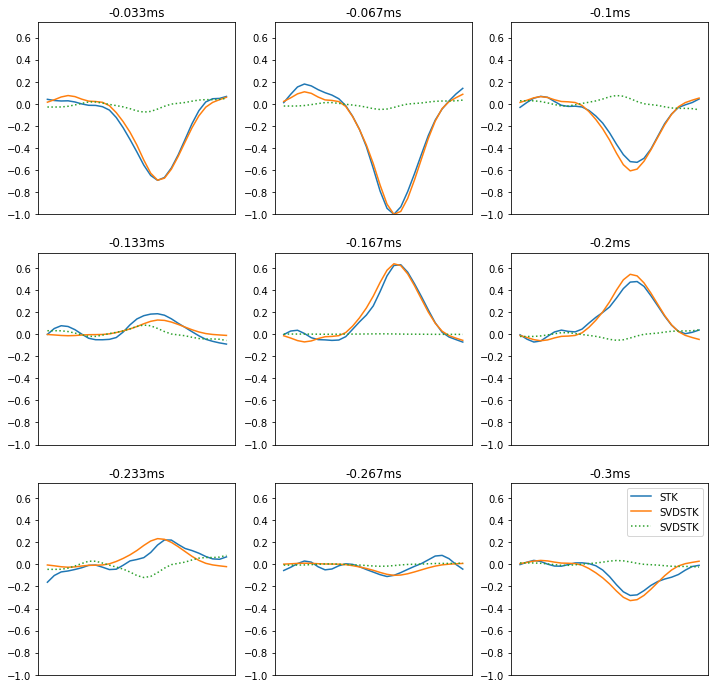

In [18]:
fig, ax = plt.subplots(3,3)
v = VT[0,:].reshape((27,27))
vcut = v[:, np.where(STK[:,:,:,cn-1] == np.min(STK[:,:,:,cn-1]))[2]]

v1 = VT[1,:].reshape((27,27))
v1cut = v1[:, np.where(STK[:,:,:,cn-1] == np.min(STK[:,:,:,cn-1]))[2]]
for i in range(9):
    argminSKcut = np.squeeze(STK[i, :, np.where(STK[:,:,:,cn-1] == np.min(STK[:,:,:,cn-1]))[2],  cn-1])
    ax.flatten()[i].plot(-argminSKcut/np.min(STK[:,:,:,cn-1]), label='STK')
    ax.flatten()[i].plot(-vcut*U[i,0]/max(vcut)/min(U[:,0]), label='SVDSTK')
    
    ax.flatten()[i].plot(-v1cut*U[i,1]/max(vcut)/min(U[:,0])*sigma[1]/sigma[0], ':',label='SVDSTK')
    
    ax.flatten()[i].set_title(str(-1*np.round((i+1)/30, 3))+'ms')
    ax.flatten()[i].set_ylim([-1, -1*max(U[:,0])/min(U[:,0])+0.1])
    ax.flatten()[i].axes.xaxis.set_visible(False)
ax.flatten()[-1].legend(loc='best')
    
    
# fig.tight_layout()
fig.set_size_inches(12,12)